<a href="https://colab.research.google.com/gist/qbeer/74d064ee596744ff4e9c9716922f471b/hw11_no_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 11.

* Running the models may take minutes. This HW takes ~30 min to complete in computational time, so make sure you don't start it 1 hour before it is due.

* Tasks 2-4. should be done using the `sklearn` library, the last is a pure TensorFlow ([Keras is part of TensorFlow](https://github.com/keras-team/keras/releases#:~:text=since%20this%20release-,Keras%202.2.,well%20as%20Theano%20and%20CNTK)) example.

  * Never do `import keras` it only references `tf.keras` since version `2.4.0`!

* The example notebook was run in Google COLAB without any package installation. I advise you to use Google COLAB with a GPU instance for the last task.

## 1. Load the CIFAR 10 dataset from the `tf.keras.datasets` API and train a `LogisticRegression` model on the dataset and predict all test outcomes with the `sklearn` API

* Create an image grid visualization of randomly selected images (9, 16) with labels.
* Preprocess the dataset for `sklearn`, scale [0-1], and also flatten each example to a vector.
* Use the `multi_class='multinomial'` option, describe what it means.
* Plot the ROC curves and AUC scores on the same figure.
* Calculate the accuracy of the classifier on the test set.

* Make your life easier - time is precious - and run all the algorithms with multiprocessing.

Hint:

* `from sklearn.preprocessing import LabelBinarizer` might be useful for you.


## 2. Train an `SGDClassifier` regression model on the dataset and predict all the test outcomes with the `sklearn` API. 

* Select the appropiate loss for this task, explain what this means.
* Time is precious, run multiple jobs at the same time.
* Plot the ROC curves and AUC scores on the same figure for the test set.
* Calculate the accuracy of the classifier.
* Why is this worse than the previous model?
* Describe the above model with your own words, how is it different than the logistic regression model?

## 3. Train a RandomForest classifier

* Plot the ROC curve with AUC scores on the test set.
* Calculate accuracy of the classifier on the test set.
* Time is precious, run multiple jobs at the same time.

## 4. Train an multi layer perceptron classifier

* use the `MLPClassifier` from `sklearn`
* Set its parameter to `max_iter = 30` or if you have time, set it for at least `100`. After `30` iterations the model does not converge but gives reasonable predictions (with default parameters).
* Plot the ROC curves with AUC scores for the test set.
* Calculate the accuracy of the model on the test set.

## 5. Train a ResNet50 CNN model on the dataset, utilize pre-trained weights and fine-tune for at least 3 epochs:

* training for 3 epochs should be enough to prove that this model is superior compared to others, train longer and you'll see exceptional results

Convert the dataset:

```python
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(32)
```

Hints:

* loading a pretrained model and letting its parameters be tunable

```python
backbone = tf.keras.applications.YOUR_MODEL_OF_CHOICE
backbone.trainable = True # DO NOT FORGET TO UNFREEZE IT
```

* defining your custom model with the pretrained backbone

```python
# YOUR_MODEL_OF_CHOICE here is ResNet50 (!) as described in the task description.

# Functional TensorFlow API
def my_own_model():
  input_placeholder = tf.keras.layers.Input(shape=(32, 32, 3))
  # DO NOT FORGET THE PROPER INPUT PREPROCESSING FOR THE BACKBONE
  x = tf.keras.applications.YOUR_MODEL_OF_CHOISE.preprocess_input(PROPER_INPUT)
  # PLEASE USE THE PROPER INPUT: (e.g. 8 bit input)
  x = backbone(x)
  # Here comes some more layers
  # and flattening at the end if needed!
  out = # layer outputting the specified number of classes
        # with or without a softmax activation, later on
        # the choice of the loss depends on this
  model = tf.keras.models.Model(inputs=inp, outputs=out)
  return model
```

## 1. Load the CIFAR 10 dataset from the `tf.keras.datasets` API and train a `LogisticRegression` model on the dataset and predict all test outcomes with the `sklearn` API

* Create an image grid visualization of randomly selected images (9, 16) with labels.
* Preprocess the dataset for `sklearn`, scale [0-1], and also flatten each example to a vector.
* Use the `multi_class='multinomial'` option, describe what it means.
* Plot the ROC curves and AUC scores on the same figure.
* Calculate the accuracy of the classifier on the test set.

* Make your life easier - time is precious - and run all the algorithms with multiprocessing.

Hint:

* `from sklearn.preprocessing import LabelBinarizer` might be useful for you.



In [1]:
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
class_labels={0: 'airplane',1: 'automobile',2: 'bird',3: 'cat',4: 'deer',5: 'dog',6: 'frog',7: 'horse',8: 'ship',9: 'truck'}

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
index = np.arange(len(x_train))
np.random.shuffle(index)
index = index[0:9*16]

fig,axes=plt.subplots(16,9, figsize=(18,32))
for i in range(16):
    for j in range(9):
        ax=axes[i][j]
        x = x_train[index[i*9+j]]
        y = y_train[index[i*9+j]][0]
        ax.imshow(x)
        ax.axis('off')
        ax.set_title(str(y)+'-'+str(class_labels[y]), fontsize=15)

plt.show()

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))

y_train=y_train.reshape(y_train.size)
y_test=y_test.reshape(y_test.size)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#get binarized labels
lb = LabelBinarizer()
lb.fit(y_train)
labels = lb.transform(y_train)

def get_labels(label):
    return labels[:,label]

In [ ]:
lb2 = LabelBinarizer()
lb2.fit(y_test)
labels2 = lb.transform(y_test)

def get_test_labels(label):
    return labels2[:,label]

In [ ]:
from  sklearn.linear_model import LogisticRegression
from multiprocessing import Pool
#multi processing
#https://stackoverflow.com/questions/56344611/how-can-take-advantage-of-multiprocessing-and-multithreading-in-deep-learning-us

In [ ]:
# multinomial-the loss minimised is the multinomial loss fit across the entire probability distribution
def fit_model(label):

    model = LogisticRegression(multi_class='multinomial',solver='newton-cg', class_weight='balanced', max_iter=10)
    _=model.fit(x_train, get_labels(label))
    prob = model.predict_proba(x_test)
    
    return prob[:,np.where(model.classes_==1)[0][0]]

In [ ]:
%%time
pool = Pool(10)
predicts = pool.map(fit_model, np.unique(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to conve

CPU times: user 17.7 s, sys: 2.94 s, total: 20.6 s
Wall time: 41min 28s


In [ ]:
predicts=np.array(predicts).T

In [3]:
#ROC curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

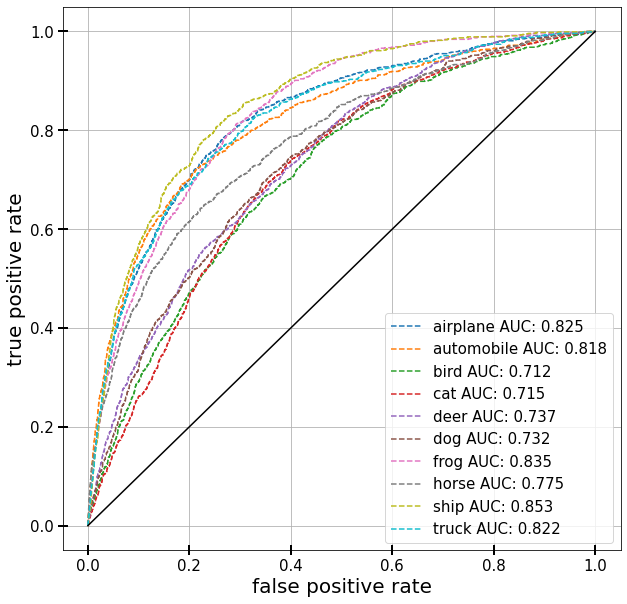

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

for i in range(10):
    y_pred=predicts[:,i]
    fpr,tpr,_ = roc_curve(get_test_labels(i), y_pred)
    ax.plot(fpr,tpr,'--', label=class_labels[i]+' AUC: '+str(np.round(roc_auc_score(get_test_labels(i), y_pred),3)))


ax.plot([0,1],[0,1],'k-')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.grid()
ax.legend(fontsize=15)

plt.show()

In [4]:
from sklearn.metrics import accuracy_score

In [ ]:
print('accuracy:',np.round(100*accuracy_score(y_test, np.argmax(predicts,axis=1)),2), '%')

accuracy: 36.57 %


## 2. Train an `SGDClassifier` regression model on the dataset and predict all the test outcomes with the `sklearn` API. 

* Select the appropiate loss for this task, explain what this means.
* Time is precious, run multiple jobs at the same time.
* Plot the ROC curves and AUC scores on the same figure for the test set.
* Calculate the accuracy of the classifier.
* Why is this worse than the previous model?
* Describe the above model with your own words, how is it different than the logistic regression model?

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
#I chose the log loss because our target is either (no hinge) 0 or 1, the dataset is imbalanced (no Huber), 
#and we actually do binary classification, cased the binarized labels.
def fit_model(label):
    model=SGDClassifier(max_iter=100, tol=1e-3,loss='log')
    _=model.fit(x_train, get_labels(label))
    prob = model.predict_proba(x_test)
    
    return prob[:,np.where(model.classes_==1)[0][0]]

In [ ]:
%%time
pool = Pool(10)
predicts = pool.map(fit_model, np.unique(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


CPU times: user 2.64 s, sys: 687 ms, total: 3.33 s
Wall time: 6min 1s


In [ ]:
predicts=np.array(predicts).T

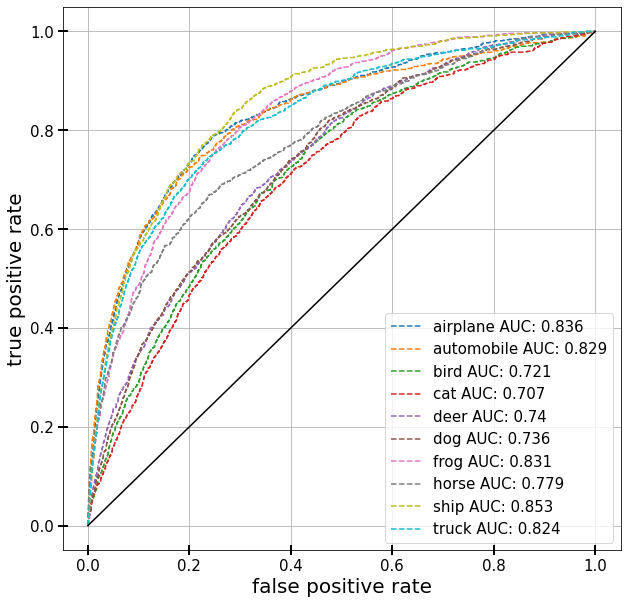

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

for i in range(10):
    y_pred=predicts[:,i]
    fpr,tpr,_ = roc_curve(get_test_labels(i), y_pred)
    ax.plot(fpr,tpr,'--', label=class_labels[i]+' AUC: '+str(np.round(roc_auc_score(get_test_labels(i), y_pred),3)))


ax.plot([0,1],[0,1],'k-')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.grid()
ax.legend(fontsize=15)

plt.show()

In [ ]:
print('accuracy:',np.round(100*accuracy_score(y_test, np.argmax(predicts,axis=1)),2), '%')

accuracy: 33.39 %


SGDClassifier is the implementation of the stochastic gradient descent optimization method, which optimize a given loss function. Now it is the loss of logistic regression. Therefore, it corresponds to the logistic regression, where the logistic loss is optimized by the SGD method. 

The LogisticRegression is the implementation of a machine learning algorithm, which defines the loss function.
 Then the optimization method is defined by the input parameter. 

The accuracy of the predictions of the two “classifiers” in the case of the same loss function came from the applied optimization methods.

## 3. Train a RandomForest classifier

* Plot the ROC curve with AUC scores on the test set.
* Calculate accuracy of the classifier on the test set.
* Time is precious, run multiple jobs at the same time.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
model = RandomForestClassifier(n_estimators=100)
_=model.fit(x_train, y_train)
predicts = model.predict_proba(x_test)

CPU times: user 3min 54s, sys: 462 ms, total: 3min 55s
Wall time: 3min 53s


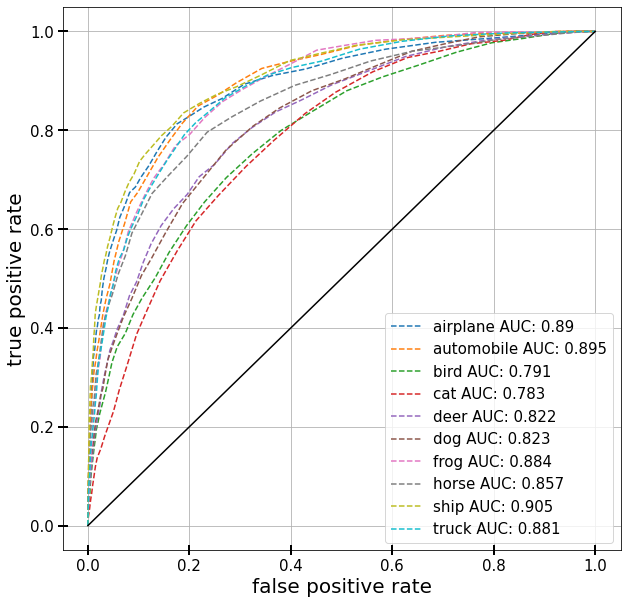

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

for i in range(10):
    y_pred=predicts[:,i]
    fpr,tpr,_ = roc_curve(get_test_labels(i), y_pred)
    ax.plot(fpr,tpr,'--', label=class_labels[i]+' AUC: '+str(np.round(roc_auc_score(get_test_labels(i), y_pred),3)))


ax.plot([0,1],[0,1],'k-')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.grid()
ax.legend(fontsize=15)

plt.show()

In [ ]:
print('accuracy:',np.round(100*accuracy_score(y_test, np.argmax(predicts,axis=1)),2), '%')

accuracy: 46.66 %


## 4. Train an multi layer perceptron classifier

* use the `MLPClassifier` from `sklearn`
* Set its parameter to `max_iter = 30` or if you have time, set it for at least `100`. After `30` iterations the model does not converge but gives reasonable predictions (with default parameters).
* Plot the ROC curves with AUC scores for the test set.
* Calculate the accuracy of the model on the test set.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
%%time
model = MLPClassifier(max_iter=30)
model.fit(x_train, y_train)

CPU times: user 4min 11s, sys: 1min 34s, total: 5min 46s
Wall time: 2min 57s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


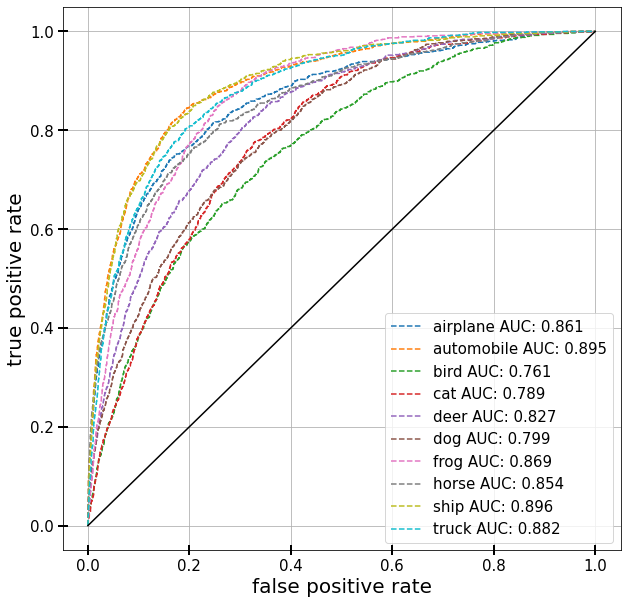

In [ ]:
#validation
predicts = model.predict_proba(x_test)

fig,ax = plt.subplots(1,1,figsize=(10,10))

for i in range(10):
    y_pred=predicts[:,i]
    fpr,tpr,_ = roc_curve(get_test_labels(i), y_pred)
    ax.plot(fpr,tpr,'--', label=class_labels[i]+' AUC: '+str(np.round(roc_auc_score(get_test_labels(i), y_pred),3)))


ax.plot([0,1],[0,1],'k-')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.grid()
ax.legend(fontsize=15)

plt.show()

In [ ]:
print('accuracy:',np.round(100*accuracy_score(y_test, np.argmax(predicts,axis=1)),2), '%')

accuracy: 43.27 %


## 5. Train a ResNet50 CNN model on the dataset, utilize pre-trained weights and fine-tune for at least 3 epochs:

* training for 3 epochs should be enough to prove that this model is superior compared to others, train longer and you'll see exceptional results

Convert the dataset:

```python
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(32)
```

Hints:

* loading a pretrained model and letting its parameters be tunable

```python
backbone = tf.keras.applications.YOUR_MODEL_OF_CHOICE
backbone.trainable = True # DO NOT FORGET TO UNFREEZE IT
```

* defining your custom model with the pretrained backbone

```python
# YOUR_MODEL_OF_CHOICE here is ResNet50 (!) as described in the task description.

# Functional TensorFlow API
def my_own_model():
  input_placeholder = tf.keras.layers.Input(shape=(32, 32, 3))
  # DO NOT FORGET THE PROPER INPUT PREPROCESSING FOR THE BACKBONE
  x = tf.keras.applications.YOUR_MODEL_OF_CHOISE.preprocess_input(PROPER_INPUT)
  # PLEASE USE THE PROPER INPUT: (e.g. 8 bit input)
  x = backbone(x)
  # Here comes some more layers
  # and flattening at the end if needed!
  out = # layer outputting the specified number of classes
        # with or without a softmax activation, later on
        # the choice of the loss depends on this
  model = tf.keras.models.Model(inputs=inp, outputs=out)
  return model
```

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train=x_train/255
x_test=x_test/255
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(32)

In [6]:
#https://medium.com/@kenneth.ca95/a-guide-to-transfer-learning-with-keras-using-resnet50-a81a4a28084b
from tensorflow.keras.applications.resnet50 import preprocess_input


def my_own_model():
    backbone = tf.keras.applications.resnet50.ResNet50
    backbone.trainable = True
    input_placeholder = tf.keras.layers.Input(shape=(32, 32, 3))
    x = tf.keras.applications.ResNet50(weights="imagenet", input_tensor=input_placeholder, include_top=False)
    x = backbone(x)
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(32, 32, 3)))
    model.add(tf.keras.layers.Resizing(224, 224, interpolation="bilinear"))
    model.add(x)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(62, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

model=my_own_model()

102981632/102967424 [==============================] - 1s 0us/step


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               128128    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='Adam' , metrics=['accuracy'])

In [9]:
%%time
history = model.fit(train_dataset, epochs=3, validation_data=test_dataset)

Epoch 1/3
1563/1563 [==============================] - 1085s 682ms/step - loss: 1.8382 - accuracy: 0.3110 - val_loss: 1.5611 - val_accuracy: 0.4225
Epoch 2/3
1563/1563 [==============================] - 1062s 680ms/step - loss: 1.3946 - accuracy: 0.4880 - val_loss: 1.6744 - val_accuracy: 0.4407
Epoch 3/3
1563/1563 [==============================] - 1065s 681ms/step - loss: 1.0743 - accuracy: 0.6156 - val_loss: 1.0465 - val_accuracy: 0.6436
CPU times: user 37min 13s, sys: 43 s, total: 37min 56s
Wall time: 54min 37s


In [10]:
predicts = model.predict(x_test)

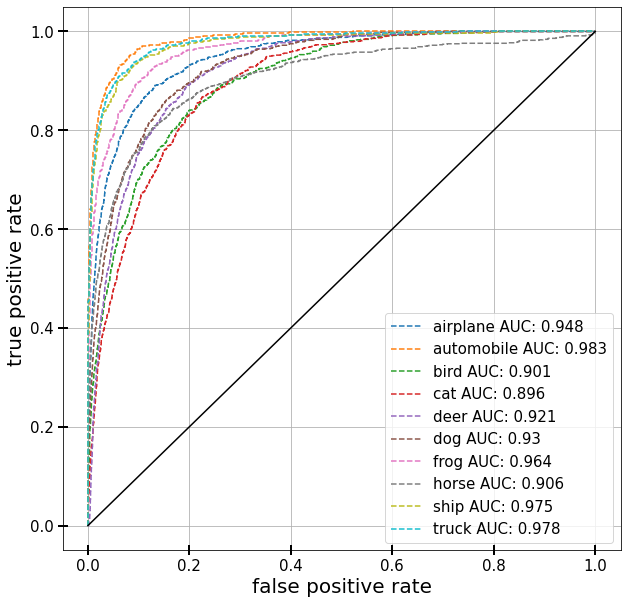

In [11]:
#validation

fig,ax = plt.subplots(1,1,figsize=(10,10))

for i in range(10):
    y_pred=predicts[:,i]
    fpr,tpr,_ = roc_curve(y_test[:,i], y_pred)
    ax.plot(fpr,tpr,'--', label=class_labels[i]+' AUC: '+str(np.round(roc_auc_score(y_test[:,i], y_pred),3)))


ax.plot([0,1],[0,1],'k-')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.grid()
ax.legend(fontsize=15)

plt.show()

In [12]:
print('accuracy:',np.round(100*accuracy_score(np.argmax(y_test,axis=1), np.argmax(predicts,axis=1)),2), '%')

accuracy: 64.36 %
